In [166]:
import os
import sys
import numpy as np
import pandas as pd
import seuif97
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

data_path = "e:/data/"
regression_data_path = "e:/result/regression/"
result_data_path = "e:/result/"

In [35]:
def get_origin_data():
    """
    origin data
    """
    # raw data
    eturb_m1_data = pd.read_csv(os.path.join(data_path, "eturb_m1_1min_metrics-0817.csv"), header = 0, index_col = None)
    eturb_m2_data = pd.read_csv(os.path.join(data_path, "eturb_m2_1min_metrics-0817.csv"), header = 0, index_col = None)
    
    data = pd.DataFrame()
    # eturb_m1
    data["eturb_m1_steam_flow_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_in"]
    data["eturb_m1_steam_pressure_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_in"]
    data["eturb_m1_steam_temperature_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_in"]
    data["eturb_m1_steam_flow_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_side"]
    data["eturb_m1_steam_pressure_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_side"]
    data["eturb_m1_steam_temperature_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_side"]
    data["eturb_m1_steam_pressure_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_out"]
    data["eturb_m1_steam_temperature_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_out"]
    data["eturb_m1_electricity_generation"] = eturb_m1_data["ExtCondensTurbineOP.electricity_generation"]
    # eturb_m2
    data["eturb_m2_steam_flow_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_in"]
    data["eturb_m2_steam_pressure_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_in"]
    data["eturb_m2_steam_temperature_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_in"]
    data["eturb_m2_steam_flow_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_side"]
    data["eturb_m2_steam_pressure_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_side"]
    data["eturb_m2_steam_temperature_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_side"]
    data["eturb_m2_steam_pressure_out"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_out"]
    data["eturb_m2_steam_temperature_out"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_out"]
    data["eturb_m2_electricity_generation"] = eturb_m2_data["ExtCondensTurbineOP.electricity_generation"]
    data = data.reset_index(drop = True)
    
    return data


def get_result_data():
    result_data = pd.DataFrame()
    file_names = [
        "eturb_m1_result_base",
        "eturb_m1_result_delta",
        "eturb_m1_result_origin",
        "eturb_m2_result_base",
        "eturb_m2_result_delta",
        "eturb_m2_result_origin"
    ]
    for name in file_names:
        temp_data = pd.read_csv(os.path.join(regression_data_path, "%s.csv" % name), header = 0, index_col = None)
        result_data = pd.concat([result_data, temp_data], axis = 1, sort = False)

    return result_data


def data_preprocessing(data, method, is_export_csv = 0):
    """
    data preprocessing
    """
    df = pd.DataFrame()
    if method == "origin":
        df = data
    elif method == "base":
        df = data
    elif method == "delta":
        df["eturb_m1_steam_flow_in"] = np.array(data["eturb_m1_steam_flow_in"].iloc[1:1441]) - np.array(data["eturb_m1_steam_flow_in"].iloc[0:1440])
        df["eturb_m1_steam_flow_side"] = np.array(data["eturb_m1_steam_flow_side"].iloc[1:1441]) - np.array(data["eturb_m1_steam_flow_side"].iloc[0:1440])
        df["eturb_m1_electricity_generation"] = np.array(data["eturb_m1_electricity_generation"].iloc[1:1441]) - np.array(data["eturb_m1_electricity_generation"].iloc[0:1440])
        df["eturb_m2_steam_flow_in"] = np.array(data["eturb_m2_steam_flow_in"].iloc[1:1441]) - np.array(data["eturb_m2_steam_flow_in"].iloc[0:1440])
        df["eturb_m2_steam_flow_side"] = np.array(data["eturb_m2_steam_flow_side"].iloc[1:1441]) - np.array(data["eturb_m2_steam_flow_side"].iloc[0:1440])
        df["eturb_m2_electricity_generation"] = np.array(data["eturb_m2_electricity_generation"].iloc[1:1441]) - np.array(data["eturb_m2_electricity_generation"].iloc[0:1440])
        if is_export_csv:
            df.to_csv(os.path.join(result_data_path, "raw_data.csv"), index = None)
    elif method == "mean":
        for i, j in zip(range(0, 1450, 10), range(60, 1450, 10)):
            temp_df = pd.DataFrame(data.iloc[i:j].mean(axis = 0))
            df = pd.concat([df, temp_df.transpose()], axis = 0, sort = False)
    
    return df


def scatter_plot(df, xlabel, *ylabels, imgpath = None):
    fig, axs = plt.subplots(figsize = (10, 7), tight_layout = True)
    for ylabel in ylabels:
        plt.scatter(df[xlabel], df[ylabel], label = ylabel)
        plt.title("%s VS %s" % (xlabel, ylabel))
        plt.xlabel("%s" % xlabel)
        plt.ylabel("%s" % ylabel)
        plt.legend()
        if imgpath:
            plt.savefig(imgpath)
        plt.show()

## 数据

In [36]:
eturb_m1_data = pd.read_csv(os.path.join(data_path, "eturb_m1.csv"), header = 0, index_col = None)

In [37]:
eturb_m1_data

,time,ExtCondensTurbineOP.steam_flow_in,ExtCondensTurbineOP.steam_pressure_in,ExtCondensTurbineOP.steam_temperature_in,ExtCondensTurbineOP.electricity_generation,ExtCondensTurbineOP.steam_pressure_out,ExtCondensTurbineOP.steam_temperature_out,ExtCondensTurbineOP.steam_flow_side,ExtCondensTurbineOP.steam_pressure_side,ExtCondensTurbineOP.steam_temperature_side
0,2020-9-11 0:00,83.655000,3.269167,432.133333,11.494167,-87.192500,51.315833,30.710000,0.779167,321.799167
1,2020-9-11 0:01,85.483333,3.279167,432.030833,11.646667,-87.195000,51.315000,31.225000,0.778333,321.871667
2,2020-9-11 0:02,86.793333,3.255833,431.655000,11.726667,-87.188333,51.342500,32.316667,0.781667,321.933333
3,2020-9-11 0:03,85.879167,3.245833,431.227500,11.643333,-87.205000,51.376667,31.770000,0.775833,322.134167
4,2020-9-11 0:04,85.996667,3.200000,430.620000,11.609167,-87.200000,51.395833,32.112500,0.773333,322.525833
...,...,...,...,...,...,...,...,...,...,...
101952,2020-11-25 23:55,79.512500,3.265000,434.940000,10.726667,-91.974167,45.777500,29.813333,0.809167,328.635000
101953,2020-11-25 23:56,77.989167,3.332500,436.605000,10.367500,-92.317500,45.730000,31.036667,0.810000,327.084167
101954,2020-11-25 23:57,77.946667,3.347500,437.720000,10.359167,-92.316667,45.385833,31.418333,0.810000,325.588333
101955,2020-11-25 23:58,77.900833,3.311667,437.115000,10.265833,-92.322500,44.921667,32.017500,0.805833,324.654167


In [38]:
data = pd.DataFrame()
# eturb_m1
data["datetime"] = eturb_m1_data["time"]
data["eturb_m1_steam_flow_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_in"]
data["eturb_m1_steam_pressure_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_in"]
data["eturb_m1_steam_temperature_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_in"]
data["eturb_m1_steam_flow_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_side"]
data["eturb_m1_steam_pressure_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_side"]
data["eturb_m1_steam_temperature_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_side"]
data['eturb_m1_steam_flow_out'] = data['eturb_m1_steam_flow_in'] - data['eturb_m1_steam_flow_side']
data["eturb_m1_steam_pressure_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_out"]
data["eturb_m1_steam_temperature_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_out"]
data["eturb_m1_electricity_generation"] = eturb_m1_data["ExtCondensTurbineOP.electricity_generation"]

In [39]:
data

,datetime,eturb_m1_steam_flow_in,eturb_m1_steam_pressure_in,eturb_m1_steam_temperature_in,eturb_m1_steam_flow_side,eturb_m1_steam_pressure_side,eturb_m1_steam_temperature_side,eturb_m1_steam_flow_out,eturb_m1_steam_pressure_out,eturb_m1_steam_temperature_out,eturb_m1_electricity_generation
0,2020-9-11 0:00,83.655000,3.269167,432.133333,30.710000,0.779167,321.799167,52.945000,-87.192500,51.315833,11.494167
1,2020-9-11 0:01,85.483333,3.279167,432.030833,31.225000,0.778333,321.871667,54.258333,-87.195000,51.315000,11.646667
2,2020-9-11 0:02,86.793333,3.255833,431.655000,32.316667,0.781667,321.933333,54.476667,-87.188333,51.342500,11.726667
3,2020-9-11 0:03,85.879167,3.245833,431.227500,31.770000,0.775833,322.134167,54.109167,-87.205000,51.376667,11.643333
4,2020-9-11 0:04,85.996667,3.200000,430.620000,32.112500,0.773333,322.525833,53.884167,-87.200000,51.395833,11.609167
...,...,...,...,...,...,...,...,...,...,...,...
101952,2020-11-25 23:55,79.512500,3.265000,434.940000,29.813333,0.809167,328.635000,49.699167,-91.974167,45.777500,10.726667
101953,2020-11-25 23:56,77.989167,3.332500,436.605000,31.036667,0.810000,327.084167,46.952500,-92.317500,45.730000,10.367500
101954,2020-11-25 23:57,77.946667,3.347500,437.720000,31.418333,0.810000,325.588333,46.528333,-92.316667,45.385833,10.359167
101955,2020-11-25 23:58,77.900833,3.311667,437.115000,32.017500,0.805833,324.654167,45.883333,-92.322500,44.921667,10.265833


In [40]:
data['eturb_m1_steam_pressure_out'] = (data['eturb_m1_steam_pressure_out'] + 101) / 1000

In [41]:
data

,datetime,eturb_m1_steam_flow_in,eturb_m1_steam_pressure_in,eturb_m1_steam_temperature_in,eturb_m1_steam_flow_side,eturb_m1_steam_pressure_side,eturb_m1_steam_temperature_side,eturb_m1_steam_flow_out,eturb_m1_steam_pressure_out,eturb_m1_steam_temperature_out,eturb_m1_electricity_generation
0,2020-9-11 0:00,83.655000,3.269167,432.133333,30.710000,0.779167,321.799167,52.945000,0.013808,51.315833,11.494167
1,2020-9-11 0:01,85.483333,3.279167,432.030833,31.225000,0.778333,321.871667,54.258333,0.013805,51.315000,11.646667
2,2020-9-11 0:02,86.793333,3.255833,431.655000,32.316667,0.781667,321.933333,54.476667,0.013812,51.342500,11.726667
3,2020-9-11 0:03,85.879167,3.245833,431.227500,31.770000,0.775833,322.134167,54.109167,0.013795,51.376667,11.643333
4,2020-9-11 0:04,85.996667,3.200000,430.620000,32.112500,0.773333,322.525833,53.884167,0.013800,51.395833,11.609167
...,...,...,...,...,...,...,...,...,...,...,...
101952,2020-11-25 23:55,79.512500,3.265000,434.940000,29.813333,0.809167,328.635000,49.699167,0.009026,45.777500,10.726667
101953,2020-11-25 23:56,77.989167,3.332500,436.605000,31.036667,0.810000,327.084167,46.952500,0.008683,45.730000,10.367500
101954,2020-11-25 23:57,77.946667,3.347500,437.720000,31.418333,0.810000,325.588333,46.528333,0.008683,45.385833,10.359167
101955,2020-11-25 23:58,77.900833,3.311667,437.115000,32.017500,0.805833,324.654167,45.883333,0.008677,44.921667,10.265833


In [42]:
data.columns

Index(['datetime', 'eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
       'eturb_m1_steam_flow_out', 'eturb_m1_steam_pressure_out',
       'eturb_m1_steam_temperature_out', 'eturb_m1_electricity_generation'],
      dtype='object')

In [43]:
data.describe()

,eturb_m1_steam_flow_in,eturb_m1_steam_pressure_in,eturb_m1_steam_temperature_in,eturb_m1_steam_flow_side,eturb_m1_steam_pressure_side,eturb_m1_steam_temperature_side,eturb_m1_steam_flow_out,eturb_m1_steam_pressure_out,eturb_m1_steam_temperature_out,eturb_m1_electricity_generation
count,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000
mean,78.108812,3.275001,430.463447,31.453592,0.760683,316.831257,46.655220,0.009762,45.681311,10.645584
std,6.600907,0.116493,4.931058,5.570850,0.034384,6.329122,5.911247,0.001793,3.094988,1.094092
min,23.331667,2.532500,412.552500,0.000000,0.292500,287.785833,16.953333,0.005690,37.323333,4.308333
25%,73.650000,3.207500,427.062500,28.020000,0.739167,312.134167,42.106667,0.008386,43.335833,9.854167
50%,78.632500,3.279167,430.460000,31.433333,0.762500,316.621667,47.403333,0.009643,45.911667,10.853333
75%,82.690000,3.350000,433.985000,34.745000,0.783333,321.420000,51.342500,0.010999,48.042500,11.425833
max,110.375833,3.626667,448.007500,70.205000,0.942500,341.938333,66.106667,0.033202,70.879167,14.121667


<AxesSubplot:xlabel='index', ylabel='eturb_m1_electricity_generation'>

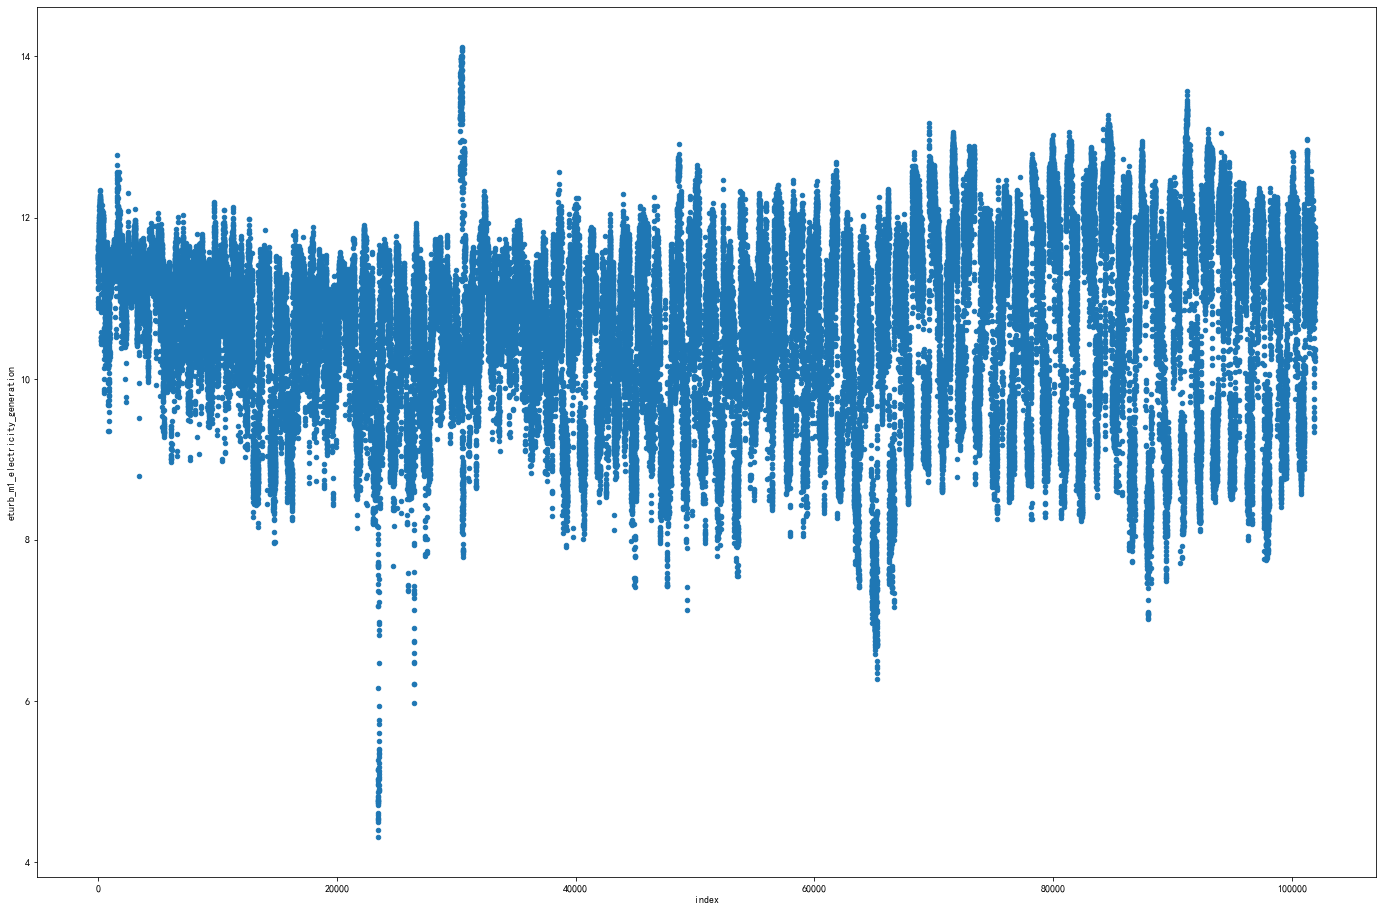

In [44]:
fig = plt.figure(figsize=(24,16))
ax = fig.add_subplot(111)
data[['eturb_m1_electricity_generation']].reset_index().plot.scatter(x ='index' , y = 'eturb_m1_electricity_generation',fig = fig,ax =ax)

c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eturb_m1_electricity_generation', ylabel='Density'>

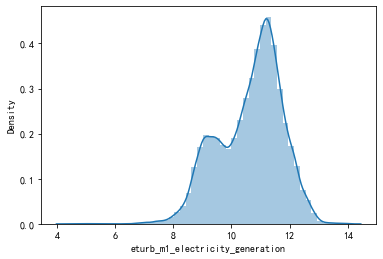

In [45]:
sns.distplot(data['eturb_m1_electricity_generation'])

## 计算焓值

In [46]:
data['eturb_m1_h_in'] = pd.Series([seuif97.pt2h(x,y) for x,y in zip(data["eturb_m1_steam_pressure_in"], data["eturb_m1_steam_temperature_in"])])
data['eturb_m1_h_side'] = pd.Series([seuif97.pt2h(x,y) for x,y in zip(data["eturb_m1_steam_pressure_side"], data["eturb_m1_steam_temperature_side"])])
data['eturb_m1_h_out'] = pd.Series([seuif97.pt2h(x,y) for x,y in zip(data["eturb_m1_steam_pressure_out"], data["eturb_m1_steam_temperature_out"])])

In [47]:
data['eturb_m1_h_out_px'] = pd.Series([seuif97.px2h(x,1) for x in data["eturb_m1_steam_pressure_out"]])

In [48]:
data['eturb_m1_h_out'].head()

0    214.837511
1    214.834026
2    214.948983
3    215.091788
4    215.171910
Name: eturb_m1_h_out, dtype: float64

In [49]:
data['eturb_m1_h_out_px'].head()

0    2595.302117
1    2595.295589
2    2595.312993
3    2595.269469
4    2595.282531
Name: eturb_m1_h_out_px, dtype: float64

## 计算公式结果

In [50]:
data['result'] = (data['eturb_m1_h_in'] * data['eturb_m1_steam_flow_in'] - data['eturb_m1_h_side'] * data['eturb_m1_steam_flow_side'] - data['eturb_m1_h_out'] * data['eturb_m1_steam_flow_out']) / 3600

In [51]:
data['result_2'] = (data['eturb_m1_h_in'] * data['eturb_m1_steam_flow_in'] - data['eturb_m1_h_side'] * data['eturb_m1_steam_flow_side'] - data['eturb_m1_h_out_px'] * data['eturb_m1_steam_flow_out']) / 3600

In [52]:
data['result'].head()

0    47.061642
1    48.205062
2    48.437235
3    48.065863
4    47.865787
Name: result, dtype: float64

In [53]:
data['result_2'].head()

0    12.052281
1    12.327318
2    12.416597
3    12.291021
4    12.240710
Name: result_2, dtype: float64

In [54]:
data['FT_in'] = data["eturb_m1_steam_flow_in"] * data["eturb_m1_steam_temperature_in"] / 3600
data['FPT_in'] = data["eturb_m1_steam_flow_in"] * data["eturb_m1_steam_pressure_in"] * data["eturb_m1_steam_temperature_in"] / 3600
data['FP_in'] = data["eturb_m1_steam_flow_in"] * data["eturb_m1_steam_pressure_in"] / 3600

In [55]:
data['FT_side'] = data["eturb_m1_steam_flow_side"] * data["eturb_m1_steam_temperature_side"] / 3600
data['FPT_side'] = data["eturb_m1_steam_flow_side"] * data["eturb_m1_steam_pressure_side"] * data["eturb_m1_steam_temperature_side"] / 3600
data['FP_side'] = data["eturb_m1_steam_flow_side"] * data["eturb_m1_steam_pressure_side"] / 3600

In [56]:
data['FT_out'] = data["eturb_m1_steam_flow_out"] * data["eturb_m1_steam_temperature_out"] / 3600
data['FPT_out'] = data["eturb_m1_steam_flow_out"] * data["eturb_m1_steam_pressure_out"] * data["eturb_m1_steam_temperature_out"] / 3600
data['FP_out'] = data["eturb_m1_steam_flow_out"] * data["eturb_m1_steam_pressure_out"] / 3600

In [57]:
data['F1T5'] = data["eturb_m1_steam_flow_in"] * data["eturb_m1_steam_temperature_out"] / 3600
data['F1P5T5'] = data["eturb_m1_steam_flow_in"] * data["eturb_m1_steam_pressure_out"] * data["eturb_m1_steam_temperature_out"] / 3600
data['F1P5'] = data["eturb_m1_steam_flow_in"] * data["eturb_m1_steam_pressure_out"] / 3600

In [58]:
data['F2T5'] = data["eturb_m1_steam_flow_side"] * data["eturb_m1_steam_temperature_out"] / 3600
data['F2P5T5'] = data["eturb_m1_steam_flow_side"] * data["eturb_m1_steam_pressure_out"] * data["eturb_m1_steam_temperature_out"] / 3600
data['F2P5'] = data["eturb_m1_steam_flow_side"] * data["eturb_m1_steam_pressure_out"] / 3600

## 增加时间特征

In [27]:
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d %H:%M:%S')

In [58]:
data['time'] = data['datetime'].dt.time
data[['datetime','time']].head()

,datetime,time
0,2020-09-04 00:00:00,00:00:00
1,2020-09-04 00:01:00,00:01:00
2,2020-09-04 00:02:00,00:02:00
3,2020-09-04 00:03:00,00:03:00
4,2020-09-04 00:04:00,00:04:00


In [60]:
#星期
#Use '%w' inside strftime to get number of weekday starting from Sunday as 0
data['weekday'] = data['datetime'].dt.strftime('%A')
data[['datetime','weekday']].head()

,datetime,weekday
0,2020-09-04 00:00:00,Friday
1,2020-09-04 00:01:00,Friday
2,2020-09-04 00:02:00,Friday
3,2020-09-04 00:03:00,Friday
4,2020-09-04 00:04:00,Friday


In [62]:
#上下午
data['period'] = data['datetime'].dt.strftime('%p')
data[['datetime','period']][:3]

,datetime,period
0,2020-09-04 00:00:00,AM
1,2020-09-04 00:01:00,AM
2,2020-09-04 00:02:00,AM


## 异常值检测

In [26]:
y = data['eturb_m1_electricity_generation']

In [27]:
X = data[['eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
        'eturb_m1_steam_pressure_out','eturb_m1_steam_temperature_out']]

In [28]:
#普通最小二乘模型（ols）
import statsmodels.api as sm
ols = sm.OLS(endog = y, exog = X)
fit = ols.fit()
test2 = fit.outlier_test()['bonf(p)']

c:\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [29]:
fit.outlier_test()

KeyboardInterrupt: 

In [ ]:
outliers = list(test2[test2<1e-3].index)
outliers

In [ ]:
#不知道为什么1451没有放进来
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

<AxesSubplot:xlabel='result', ylabel='eturb_m1_electricity_generation'>

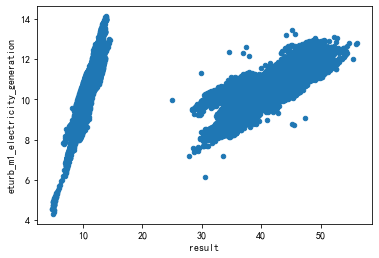

In [59]:
data[['eturb_m1_electricity_generation','result']].plot.scatter(x = 'result', y = 'eturb_m1_electricity_generation')

<AxesSubplot:xlabel='result_2', ylabel='eturb_m1_electricity_generation'>

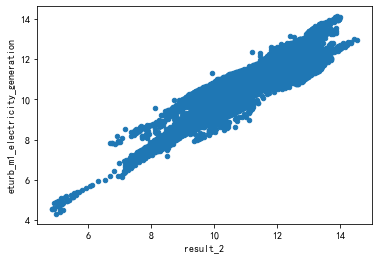

In [60]:
data[['eturb_m1_electricity_generation','result_2']].plot.scatter(x = 'result_2', y = 'eturb_m1_electricity_generation')

In [61]:
data[['eturb_m1_electricity_generation','result_2']].sort_values('result_2')

,eturb_m1_electricity_generation,result_2
23491,4.549167,4.864828
23490,4.533333,4.866255
23492,4.581667,4.910591
23489,4.609167,4.919044
23500,4.877500,4.929728
...,...,...
101245,12.816667,14.268456
101249,12.834167,14.330757
101240,12.782500,14.334048
101247,12.979167,14.424201


In [62]:
data[['eturb_m1_electricity_generation','result_2']][data['result_2'] <= 1]

,eturb_m1_electricity_generation,result_2


In [33]:
#data[data['result_2'] <= 1].index

Int64Index([29203, 29204, 29205, 29206, 29207, 29208, 29209, 29210, 29211,
            29212,
            ...
            32042, 32043, 32044, 32045, 32046, 32047, 32048, 32049, 32050,
            32051],
           dtype='int64', length=2849)

In [62]:
#data.drop(index= data[data['result_2'] <= 1].index, inplace=True)

<AxesSubplot:xlabel='result_2', ylabel='eturb_m1_electricity_generation'>

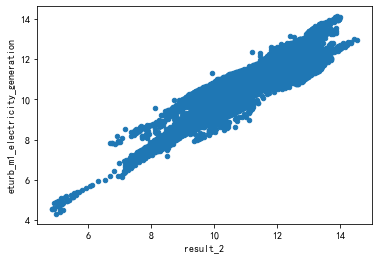

In [63]:
data[['eturb_m1_electricity_generation','result_2']].plot.scatter(x = 'result_2', y = 'eturb_m1_electricity_generation')

In [64]:
df = data[['eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
       'eturb_m1_steam_flow_out', 'eturb_m1_steam_pressure_out',
       'eturb_m1_steam_temperature_out','eturb_m1_electricity_generation']]

In [65]:
df.corr()

,eturb_m1_steam_flow_in,eturb_m1_steam_pressure_in,eturb_m1_steam_temperature_in,eturb_m1_steam_flow_side,eturb_m1_steam_pressure_side,eturb_m1_steam_temperature_side,eturb_m1_steam_flow_out,eturb_m1_steam_pressure_out,eturb_m1_steam_temperature_out,eturb_m1_electricity_generation
eturb_m1_steam_flow_in,1.000000,-0.408428,0.101122,0.539307,0.125993,0.572134,0.608418,0.421853,0.504489,0.845139
eturb_m1_steam_pressure_in,-0.408428,1.000000,0.187813,-0.297330,0.052611,-0.455781,-0.175870,-0.071510,-0.150734,-0.292575
eturb_m1_steam_temperature_in,0.101122,0.187813,1.000000,-0.060165,-0.036181,0.536413,0.169620,0.149437,0.160011,0.257111
eturb_m1_steam_flow_side,0.539307,-0.297330,-0.060165,1.000000,-0.057168,0.331607,-0.340188,-0.185874,-0.200357,0.060255
eturb_m1_steam_pressure_side,0.125993,0.052611,-0.036181,-0.057168,1.000000,0.342456,0.194568,-0.225409,-0.158418,0.094732
eturb_m1_steam_temperature_side,0.572134,-0.455781,0.536413,0.331607,0.342456,1.000000,0.326374,0.057571,0.163155,0.514021
eturb_m1_steam_flow_out,0.608418,-0.175870,0.169620,-0.340188,0.194568,0.326374,1.000000,0.646240,0.752167,0.886955
eturb_m1_steam_pressure_out,0.421853,-0.071510,0.149437,-0.185874,-0.225409,0.057571,0.646240,1.000000,0.946598,0.558627
eturb_m1_steam_temperature_out,0.504489,-0.150734,0.160011,-0.200357,-0.158418,0.163155,0.752167,0.946598,1.000000,0.680465
eturb_m1_electricity_generation,0.845139,-0.292575,0.257111,0.060255,0.094732,0.514021,0.886955,0.558627,0.680465,1.000000


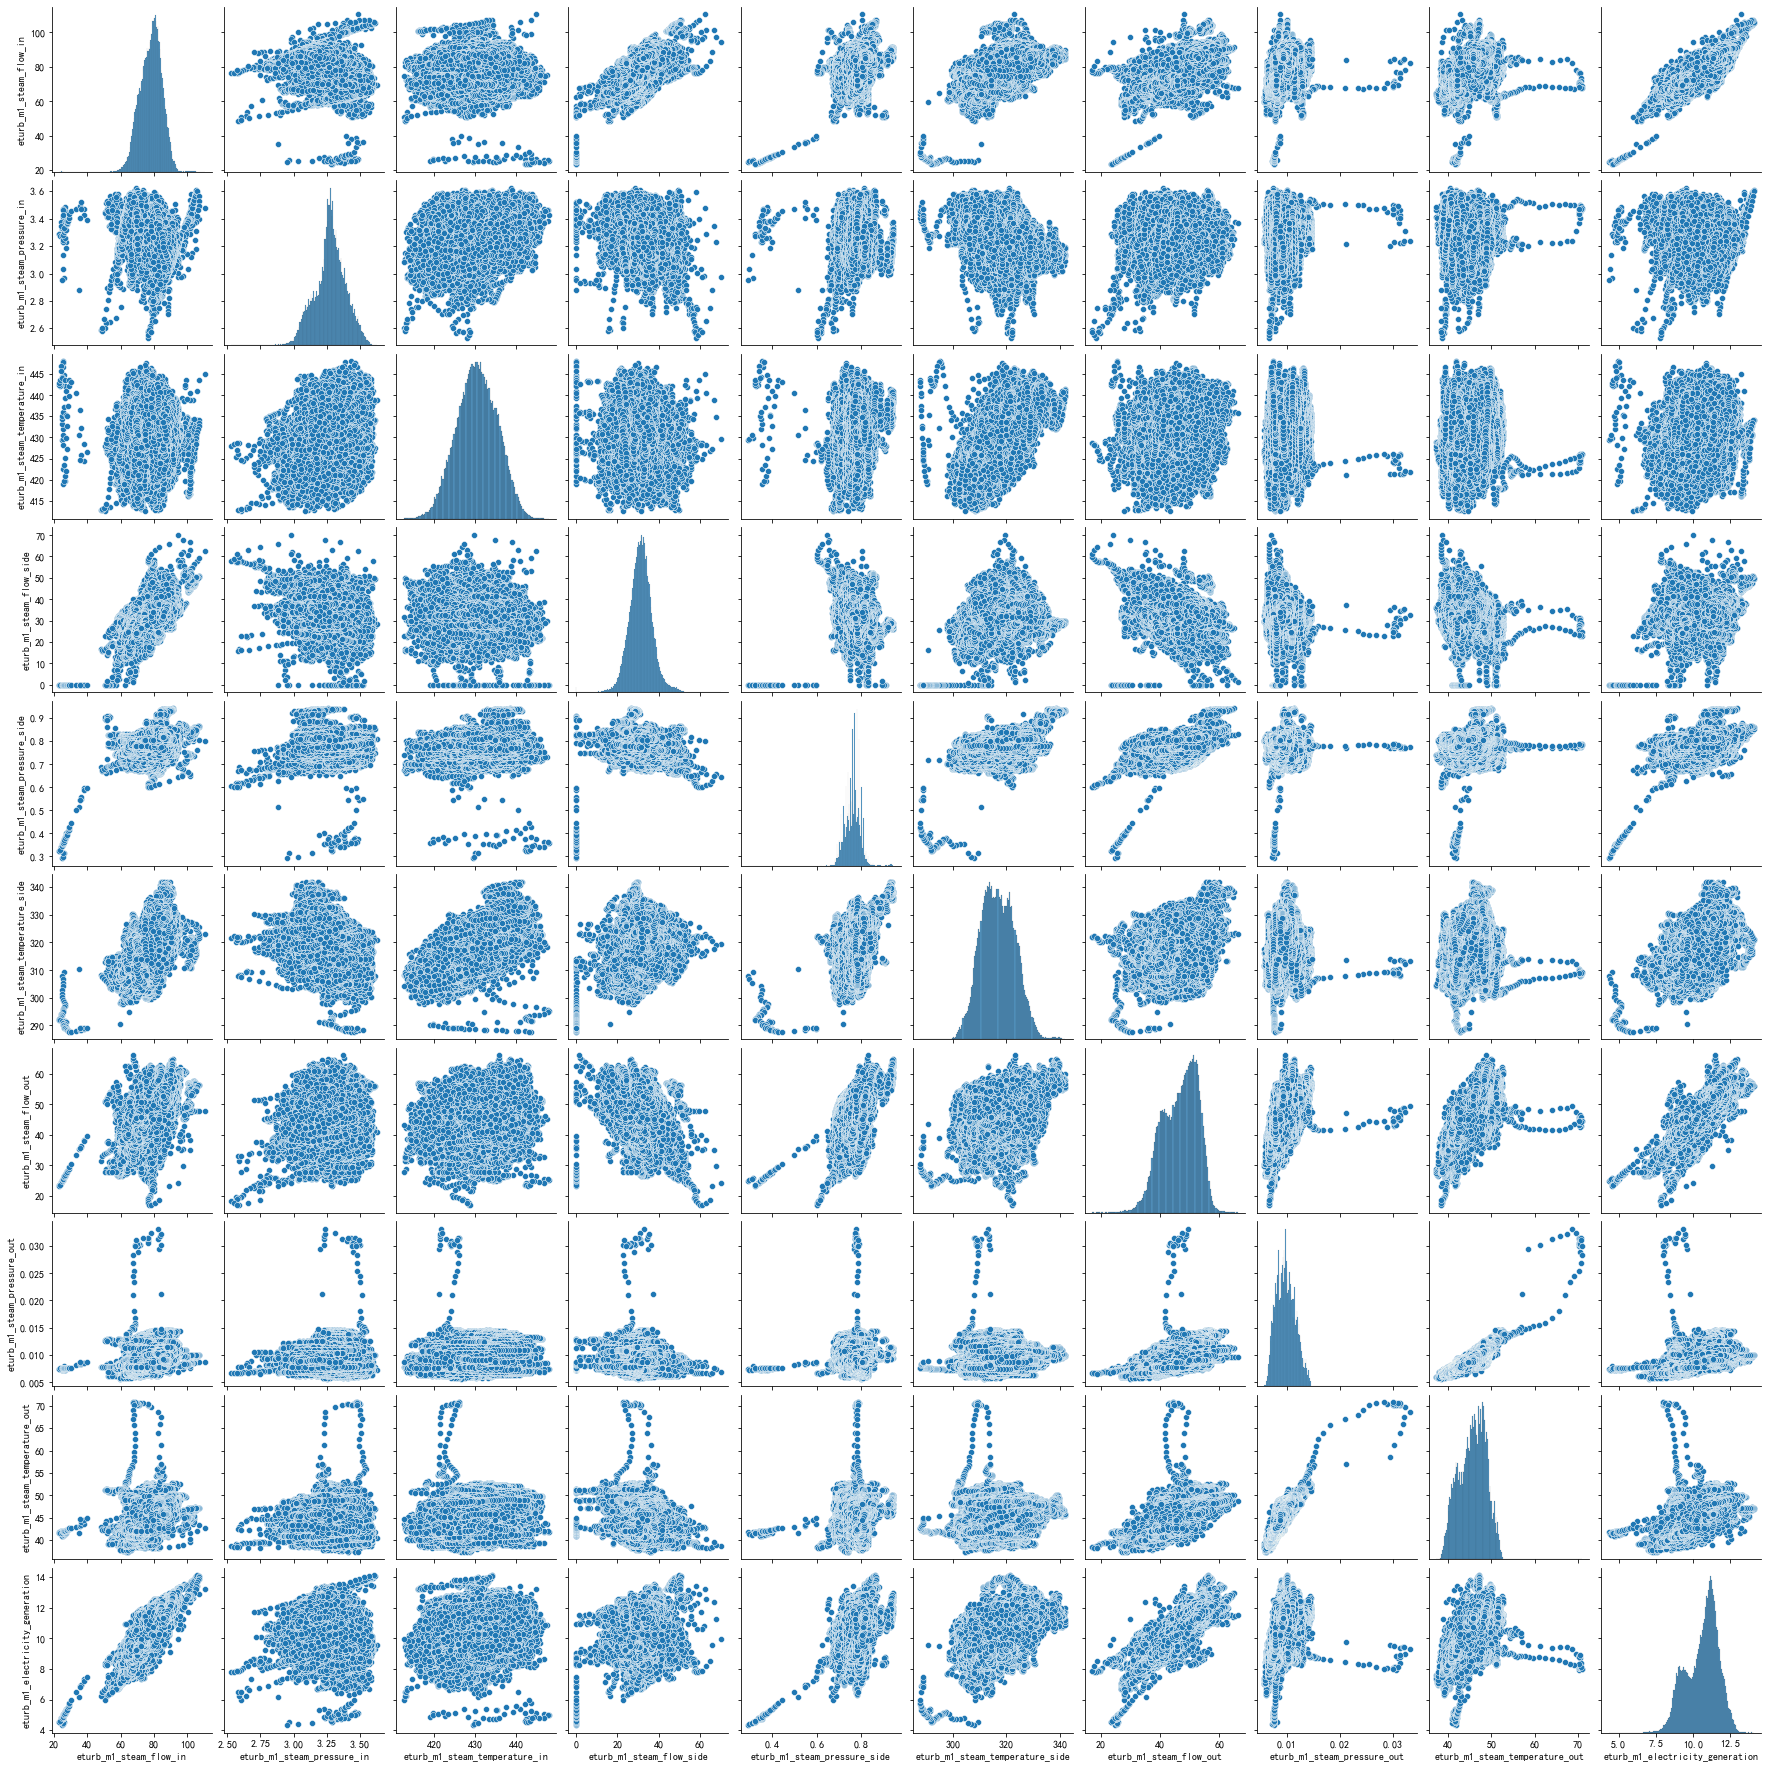

In [66]:
sns.pairplot(df, kind="scatter")
plt.show()

In [67]:
df = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side','FT_out','FPT_out','FP_out']]

In [68]:
df.corr()

,FT_in,FPT_in,FP_in,FT_side,FPT_side,FP_side,FT_out,FPT_out,FP_out
FT_in,1.000000,0.911683,0.913804,0.566609,0.580671,0.538015,0.612559,0.519568,0.541135
FPT_in,0.911683,1.000000,0.990452,0.458759,0.481844,0.453172,0.585219,0.515015,0.535588
FP_in,0.913804,0.990452,1.000000,0.476290,0.501139,0.480198,0.583897,0.513542,0.533617
FT_side,0.566609,0.458759,0.476290,1.000000,0.970360,0.971476,-0.268905,-0.241559,-0.247370
FPT_side,0.580671,0.481844,0.501139,0.970360,1.000000,0.994922,-0.242556,-0.251576,-0.253952
FP_side,0.538015,0.453172,0.480198,0.971476,0.994922,1.000000,-0.288336,-0.283012,-0.287499
FT_out,0.612559,0.585219,0.583897,-0.268905,-0.242556,-0.288336,1.000000,0.930306,0.946269
FPT_out,0.519568,0.515015,0.513542,-0.241559,-0.251576,-0.283012,0.930306,1.000000,0.996337
FP_out,0.541135,0.535588,0.533617,-0.247370,-0.253952,-0.287499,0.946269,0.996337,1.000000


In [69]:
sns.pairplot(df, kind="scatter")
plt.show()

KeyboardInterrupt: 

In [70]:
#偏回归图
fig = plt.figure(figsize=(24,16))
fig = sm.graphics.plot_partregress("eturb_m1_electricity_generation", "eturb_m1_steam_flow_in", ["eturb_m1_steam_pressure_in"], data=data)
fig.tight_layout(pad=1.0)

c:\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


KeyboardInterrupt: 

<Figure size 1728x1152 with 0 Axes>

Error in callback <function flush_figures at 0x000001E2C0ACDF78> (for post_execute):


KeyboardInterrupt: 

In [71]:
sm.add_constant(data['result'])

,const,result
0,1.0,47.061642
1,1.0,48.205062
2,1.0,48.437235
3,1.0,48.065863
4,1.0,47.865787
...,...,...
101952,1.0,11.550303
101953,1.0,11.152347
101954,1.0,11.173963
101955,1.0,11.086357


In [72]:
X = sm.add_constant(data['result'])
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [73]:
results = model.fit()

In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.025
Model:                                         OLS   Adj. R-squared:                  0.025
Method:                              Least Squares   F-statistic:                     2664.
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:14:03   Log-Likelihood:            -1.5252e+05
No. Observations:                           101957   AIC:                         3.051e+05
Df Residuals:                               101955   BIC:                         3.051e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4018      0.006   1790.285      0.000      10.390      10.413
result         0.0117      0.000     51.615      0.000       0.011       0.012
==============================================================================
Omnibus:                     2215.911   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2353.307
Skew:                          -0.369   Prob(JB):                         0.00
Kurtosis:                       2.901   Cond. No.                         44.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
data.to_csv('temp.csv')

In [75]:
X = sm.add_constant(data['result'][data['result'] >= 20])
y = data['eturb_m1_electricity_generation'][data['result'] >= 20]
model = sm.OLS(y, X)

In [76]:
results = model.fit()

In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.753
Model:                                         OLS   Adj. R-squared:                  0.753
Method:                              Least Squares   F-statistic:                 9.756e+04
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:14:20   Log-Likelihood:                -20098.
No. Observations:                            31981   AIC:                         4.020e+04
Df Residuals:                                31979   BIC:                         4.022e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5549      0.023    154.357      0.000       3.510       3.600
result         0.1680      0.001    312.342      0.000       0.167       0.169
==============================================================================
Omnibus:                     2340.094   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3125.384
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       3.824   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
yhat = results.predict(X)

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


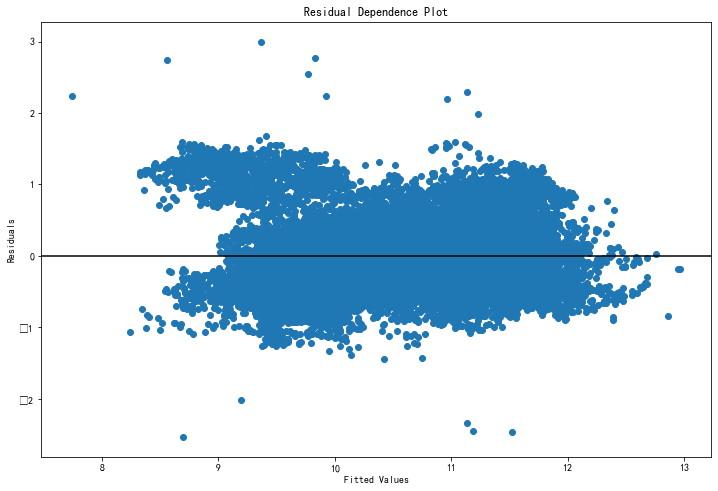

In [79]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

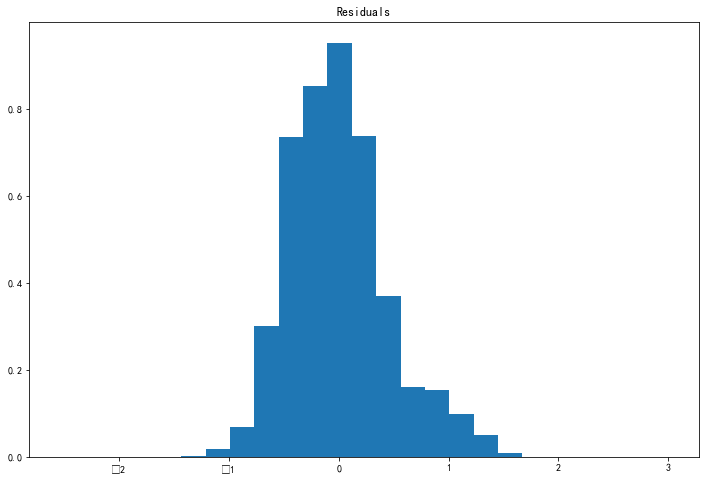

In [80]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title="Residuals")
ax.hist(results.resid, bins=25, density=True);

c:\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


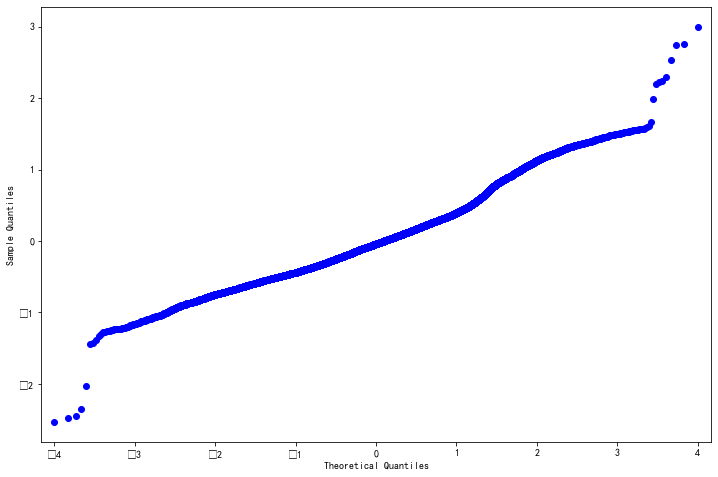

In [81]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = sm.graphics.qqplot(results.resid, line='r', ax=ax)

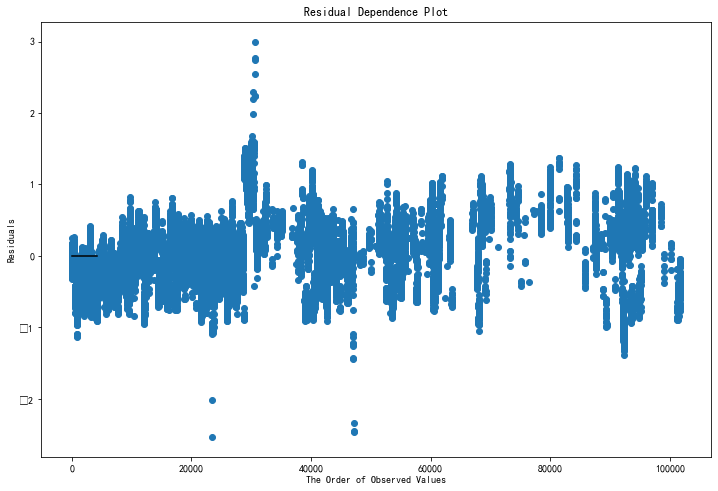

In [82]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='The Order of Observed Values',
                          ylabel='Residuals')
ax.scatter(results.resid.index, results.resid)
ax.axis('tight')
ax.plot([0.0, 4320],[0.0, 0.0], 'k-');

In [83]:
data.describe()

,eturb_m1_steam_flow_in,eturb_m1_steam_pressure_in,eturb_m1_steam_temperature_in,eturb_m1_steam_flow_side,eturb_m1_steam_pressure_side,eturb_m1_steam_temperature_side,eturb_m1_steam_flow_out,eturb_m1_steam_pressure_out,eturb_m1_steam_temperature_out,eturb_m1_electricity_generation,...,FP_side,FT_out,FPT_out,FP_out,F1T5,F1P5T5,F1P5,F2T5,F2P5T5,F2P5
count,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,...,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000,101957.000000
mean,78.108812,3.275001,430.463447,31.453592,0.760683,316.831257,46.655220,0.009762,45.681311,10.645584,...,0.006643,0.595842,0.005970,0.000128,0.994005,0.009878,0.000213,0.398163,0.003908,0.000085
std,6.600907,0.116493,4.931058,5.570850,0.034384,6.329122,5.911247,0.001793,3.094988,1.094092,...,0.001181,0.107064,0.002023,0.000035,0.129258,0.002854,0.000048,0.069938,0.001058,0.000019
min,23.331667,2.532500,412.552500,0.000000,0.292500,287.785833,16.953333,0.005690,37.323333,4.308333,...,0.000000,0.180710,0.001194,0.000031,0.270075,0.002031,0.000049,0.000000,0.000000,0.000000
25%,73.650000,3.207500,427.062500,28.020000,0.739167,312.134167,42.106667,0.008386,43.335833,9.854167,...,0.005894,0.510628,0.004360,0.000100,0.894365,0.007667,0.000176,0.353784,0.003117,0.000071
50%,78.632500,3.279167,430.460000,31.433333,0.762500,316.621667,47.403333,0.009643,45.911667,10.853333,...,0.006649,0.605843,0.005856,0.000127,1.010401,0.009780,0.000213,0.396886,0.003864,0.000084
75%,82.690000,3.350000,433.985000,34.745000,0.783333,321.420000,51.342500,0.010999,48.042500,11.425833,...,0.007386,0.681940,0.007381,0.000154,1.091791,0.011952,0.000249,0.442334,0.004700,0.000099
max,110.375833,3.626667,448.007500,70.205000,0.942500,341.938333,66.106667,0.033202,70.879167,14.121667,...,0.013907,0.942549,0.031294,0.000456,1.576618,0.051995,0.000758,0.752006,0.021352,0.000317


In [162]:
X = sm.add_constant(data['result_2'])
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [163]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.920
Model:                                         OLS   Adj. R-squared:                  0.920
Method:                              Least Squares   F-statistic:                 1.171e+06
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:35:51   Log-Likelihood:                -25121.
No. Observations:                           101957   AIC:                         5.025e+04
Df Residuals:                               101955   BIC:                         5.026e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1889      0.010    -18.782      0.000      -0.209      -0.169
result_2       0.9833      0.001   1082.350      0.000       0.981       0.985
==============================================================================
Omnibus:                     5804.855   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21178.782
Skew:                           0.184   Prob(JB):                         0.00
Kurtosis:                       5.202   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
yhat = results.predict(X)

In [168]:
mean_squared_error(y,yhat)

0.09583731988052376

In [170]:
r2_score(y,yhat)

0.9199370525179235

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


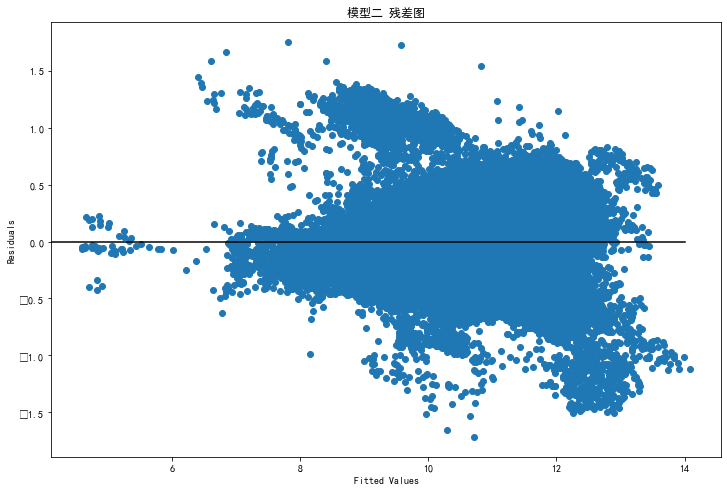

In [87]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='模型二 残差图', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

In [88]:
df_y = pd.DataFrame()
df_y['Fitted Values'] = yhat
df_y['Observed Values'] = y

<AxesSubplot:title={'center':'模型二 观察值与拟合值'}, xlabel='Observed Values', ylabel='Fitted Values'>

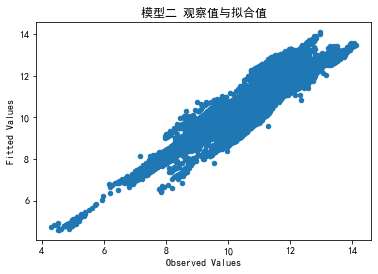

In [89]:
df_y.plot.scatter(x = 'Observed Values', y = 'Fitted Values',title = '模型二 观察值与拟合值')

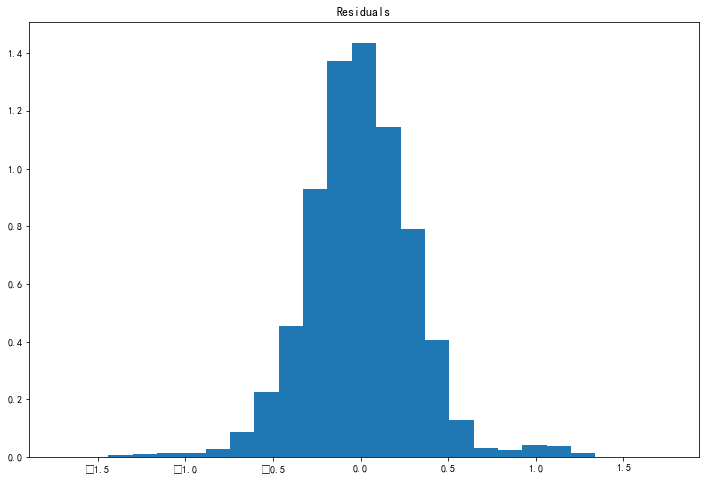

In [90]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title="Residuals")
ax.hist(results.resid, bins=25, density=True);

c:\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


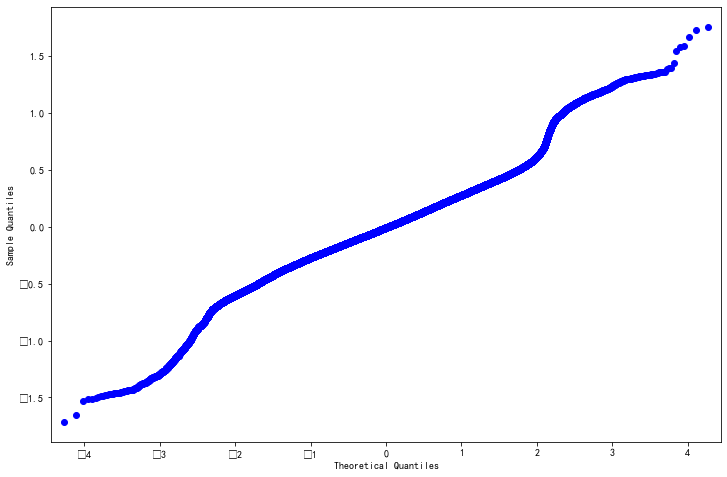

In [91]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = sm.graphics.qqplot(results.resid, line='r', ax=ax)

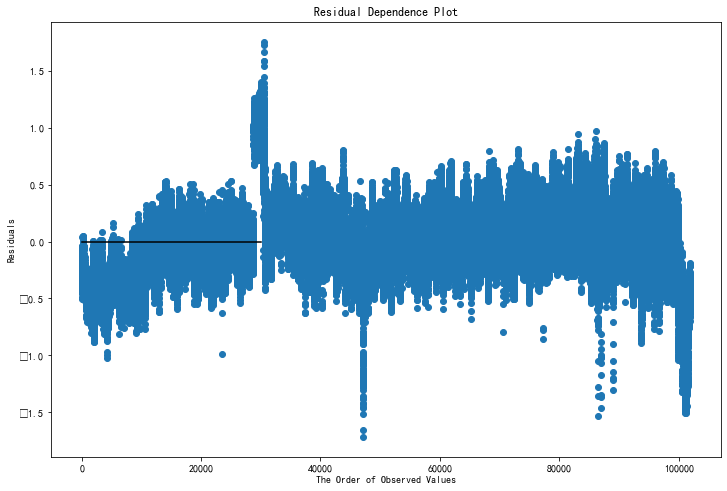

In [92]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='The Order of Observed Values',
                          ylabel='Residuals')
ax.scatter(results.resid.index, results.resid)
ax.axis('tight')
ax.plot([0.0, 30020],[0.0, 0.0], 'k-');

## 模型
$$ E=k_1F_1 + k_2F_2+b $$

In [171]:
data_copy = data.copy()

In [172]:
data = data

In [173]:
X = data[['eturb_m1_steam_flow_in','eturb_m1_steam_flow_side']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)
results = model.fit()
yhat = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.935
Model:                                         OLS   Adj. R-squared:                  0.935
Method:                              Least Squares   F-statistic:                 7.318e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:37:36   Log-Likelihood:                -14595.
No. Observations:                           101957   AIC:                         2.920e+04
Df Residuals:                               101954   BIC:                         2.923e+04
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7448      0.010    -71.532      0.000      -0.765      -0.724
eturb_m1_steam_flow_in       0.1899      0.000   1207.404      0.000       0.190       0.190
eturb_m1_steam_flow_side    -0.1095      0.000   -587.674      0.000      -0.110      -0.109
==============================================================================
Omnibus:                     4804.916   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6316.962
Skew:                          -0.475   Prob(JB):                         0.00
Kurtosis:                       3.764   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [174]:
mean_squared_error(y,yhat)

0.07795872957495656

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


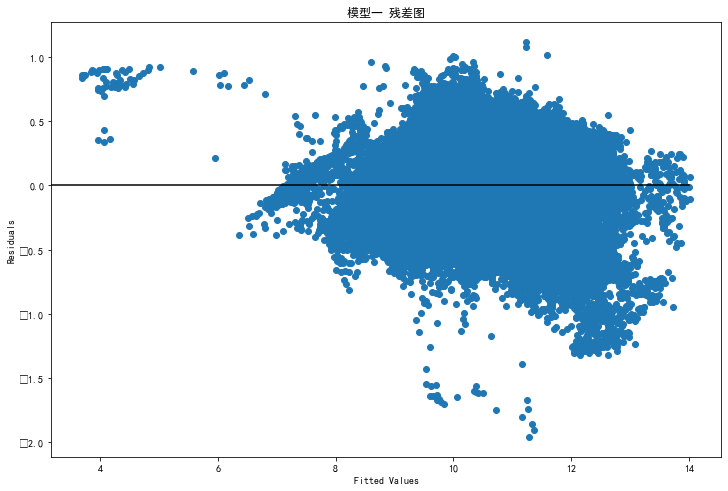

In [96]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='模型一 残差图', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

<AxesSubplot:title={'center':'模型一 观察值与拟合值'}, xlabel='Observed Values', ylabel='Fitted Values'>

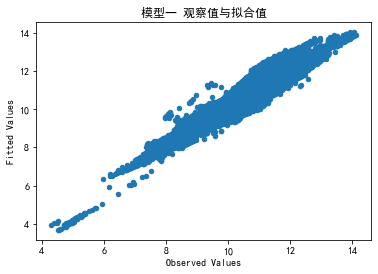

In [97]:
df_y = pd.DataFrame()
df_y['Fitted Values'] = yhat
df_y['Observed Values'] = y
df_y.plot.scatter(x = 'Observed Values', y = 'Fitted Values',title = '模型一 观察值与拟合值')

<AxesSubplot:title={'center':'全体'}, xlabel='eturb_m1_steam_flow_in', ylabel='eturb_m1_electricity_generation'>

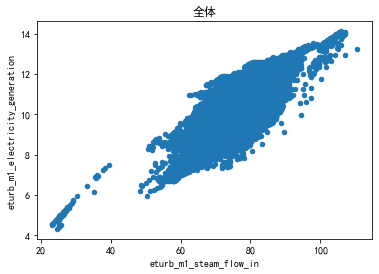

In [100]:
data[['eturb_m1_electricity_generation','eturb_m1_steam_flow_in']].plot.scatter(x = 'eturb_m1_steam_flow_in', y = 'eturb_m1_electricity_generation',title = '全体')

In [101]:
data[['eturb_m1_steam_flow_in','eturb_m1_steam_flow_side','eturb_m1_electricity_generation']].describe().loc[['25%','75%']].T

,25%,75%
eturb_m1_steam_flow_in,73.650000,82.690000
eturb_m1_steam_flow_side,28.020000,34.745000
eturb_m1_electricity_generation,9.854167,11.425833


c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='eturb_m1_steam_flow_side', ylabel='Density'>

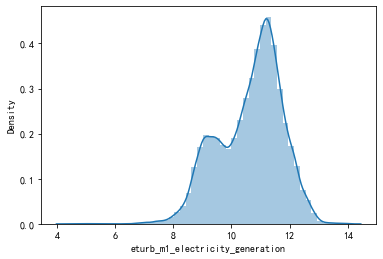

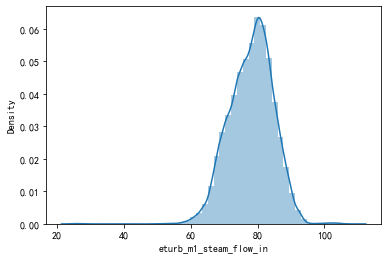

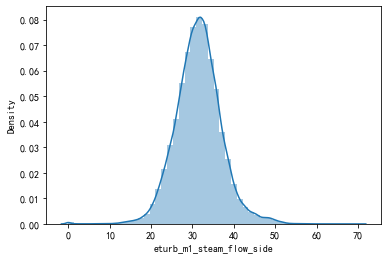

In [102]:
plt.figure(1); 
sns.distplot(data['eturb_m1_electricity_generation'])
plt.figure(2);
sns.distplot(data['eturb_m1_steam_flow_in'])
plt.figure(3);
sns.distplot(data['eturb_m1_steam_flow_side'])

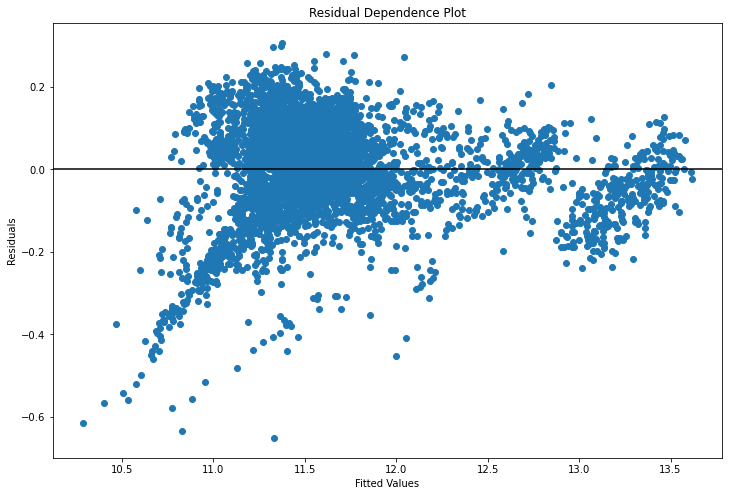

In [345]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

## 模型---

In [103]:
data['result'].diff().iloc[1:]

1         1.143420
2         0.232174
3        -0.371372
4        -0.200076
5        -0.161876
            ...   
101952   -0.721058
101953   -0.397956
101954    0.021616
101955   -0.087606
101956   -0.078685
Name: result, Length: 101956, dtype: float64

In [104]:
X = data['result'][data['result'] >= 20].diff().iloc[1:]
y = data['eturb_m1_electricity_generation'][data['result'] >= 20].diff().iloc[1:]
model = sm.OLS(y, X)

c:\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [105]:
results = model.fit()

In [106]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared (uncentered):                   0.807
Model:                                         OLS   Adj. R-squared (uncentered):              0.807
Method:                              Least Squares   F-statistic:                          1.334e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):                        0.00
Time:                                     17:21:48   Log-Likelihood:                          33557.
No. Observations:                            31980   AIC:                                 -6.711e+04
Df Residuals:                                31979   BIC:                                 -6.710e+04
Df Model:                                        1                                                  
Covariance Type:                         nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
result         0.1924      0.001    365.301      0.000       0.191       0.193
==============================================================================
Omnibus:                    20691.982   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15180041.961
Skew:                           1.749   Prob(JB):                         0.00
Kurtosis:                     109.677   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [108]:
data['result_Standard'] = Scaler.fit_transform(data[['result']])
data['eturb_m1_electricity_generation_Standard'] = Scaler.fit_transform(data[['eturb_m1_electricity_generation']])

In [109]:
X = sm.add_constant(data['result_Standard'][data['result'] >= 20])
y = data['eturb_m1_electricity_generation_Standard'][data['result'] >= 20]
model = sm.OLS(y, X)

In [110]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     eturb_m1_electricity_generation_Standard   R-squared:                       0.753
Model:                                                  OLS   Adj. R-squared:                  0.753
Method:                                       Least Squares   F-statistic:                 9.756e+04
Date:                                      Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                              17:21:55   Log-Likelihood:                -17223.
No. Observations:                                     31981   AIC:                         3.445e+04
Df Residuals:                                         31979   BIC:                         3.447e+04
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.2785      0.011   -300.299      0.000      -3.300      -3.257
result_Standard     2.2931      0.007    312.342      0.000       2.279       2.308
==============================================================================
Omnibus:                     2340.094   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3125.384
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       3.824   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
X = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side','FT_out','FPT_out','FP_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [178]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.964
Model:                                         OLS   Adj. R-squared:                  0.964
Method:                              Least Squares   F-statistic:                 2.992e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:39:16   Log-Likelihood:                 14955.
No. Observations:                           101957   AIC:                        -2.989e+04
Df Residuals:                               101947   BIC:                        -2.979e+04
Df Model:                                        9                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0533      0.013    -80.680      0.000      -1.079      -1.028
FT_in          1.2323      0.010    126.541      0.000       1.213       1.251
FPT_in        -0.0926      0.004    -23.236      0.000      -0.100      -0.085
FP_in         50.2886      1.890     26.602      0.000      46.583      53.994
FT_side        0.2033      0.012     17.234      0.000       0.180       0.226
FPT_side       0.2319      0.036      6.415      0.000       0.161       0.303
FP_side     -529.4038     13.060    -40.536      0.000    -555.001    -503.806
FT_out         5.3596      0.081     66.193      0.000       5.201       5.518
FPT_out     -204.1457      6.389    -31.954      0.000    -216.668    -191.624
FP_out      -482.2345    345.539     -1.396      0.163   -1159.487     195.018
==============================================================================
Omnibus:                     6031.875   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13016.359
Skew:                          -0.399   Prob(JB):                         0.00
Kurtosis:                       4.558   Cond. No.                     1.70e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.0436639507061827

In [180]:
X = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side','FT_out','FPT_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [181]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.964
Model:                                         OLS   Adj. R-squared:                  0.964
Method:                              Least Squares   F-statistic:                 3.366e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:39:48   Log-Likelihood:                 14954.
No. Observations:                           101957   AIC:                        -2.989e+04
Df Residuals:                               101948   BIC:                        -2.980e+04
Df Model:                                        8                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0491      0.013    -82.526      0.000      -1.074      -1.024
FT_in          1.2248      0.008    151.187      0.000       1.209       1.241
FPT_in        -0.0906      0.004    -24.393      0.000      -0.098      -0.083
FP_in         49.4207      1.785     27.684      0.000      45.922      52.920
FT_side        0.2106      0.011     19.961      0.000       0.190       0.231
FPT_side       0.2238      0.036      6.272      0.000       0.154       0.294
FP_side     -525.7551     12.796    -41.088      0.000    -550.835    -500.676
FT_out         5.4069      0.074     73.516      0.000       5.263       5.551
FPT_out     -212.7379      1.707   -124.651      0.000    -216.083    -209.393
==============================================================================
Omnibus:                     6136.541   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13726.166
Skew:                          -0.394   Prob(JB):                         0.00
Kurtosis:                       4.615   Cond. No.                     6.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.043664784905647236

In [183]:
X = data[['eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
       'eturb_m1_steam_flow_out', 'eturb_m1_steam_pressure_out',
       'eturb_m1_steam_temperature_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [184]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.962
Model:                                         OLS   Adj. R-squared:                  0.962
Method:                              Least Squares   F-statistic:                 3.221e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:40:00   Log-Likelihood:                 12789.
No. Observations:                           101957   AIC:                        -2.556e+04
Df Residuals:                               101948   BIC:                        -2.547e+04
Df Model:                                        8                                         
Covariance Type:                         nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -9.5038      0.068   -140.696      0.000      -9.636      -9.371
eturb_m1_steam_flow_in              0.0936      0.000    848.646      0.000       0.093       0.094
eturb_m1_steam_pressure_in          0.2282      0.009     24.268      0.000       0.210       0.247
eturb_m1_steam_temperature_in       0.0199      0.000     77.103      0.000       0.019       0.020
eturb_m1_steam_flow_side           -0.0132      0.000   -123.925      0.000      -0.013      -0.013
eturb_m1_steam_pressure_side       -4.1541      0.029   -144.758      0.000      -4.210      -4.098
eturb_m1_steam_temperature_side     0.0041      0.000     15.198      0.000       0.004       0.005
eturb_m1_steam_flow_out             0.1068      0.000    788.118      0.000       0.107       0.107
eturb_m1_steam_pressure_out      -146.5357      1.276   -114.818      0.000    -149.037    -144.034
eturb_m1_steam_temperature_out      0.0496      0.001     58.548      0.000       0.048       0.051
==============================================================================
Omnibus:                     3536.530   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4717.949
Skew:                          -0.379   Prob(JB):                         0.00
Kurtosis:                       3.732   Cond. No.                     4.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [185]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.04555930675275007

In [186]:
X = data[['eturb_m1_steam_flow_in', 'eturb_m1_steam_temperature_in', 
          'eturb_m1_steam_flow_side','eturb_m1_steam_temperature_side',
          'eturb_m1_steam_pressure_out','eturb_m1_steam_temperature_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [187]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.953
Model:                                         OLS   Adj. R-squared:                  0.953
Method:                              Least Squares   F-statistic:                 3.435e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:40:22   Log-Likelihood:                 1892.7
No. Observations:                           101957   AIC:                            -3771.
Df Residuals:                               101950   BIC:                            -3705.
Df Model:                                        6                                         
Covariance Type:                         nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -13.3220      0.070   -191.186      0.000     -13.459     -13.185
eturb_m1_steam_flow_in              0.1916      0.000    799.134      0.000       0.191       0.192
eturb_m1_steam_temperature_in       0.0330      0.000    165.291      0.000       0.033       0.033
eturb_m1_steam_flow_side           -0.1049      0.000   -485.081      0.000      -0.105      -0.105
eturb_m1_steam_temperature_side    -0.0121      0.000    -61.976      0.000      -0.012      -0.012
eturb_m1_steam_pressure_out      -150.1986      1.420   -105.789      0.000    -152.981    -147.416
eturb_m1_steam_temperature_out      0.0746      0.001     80.698      0.000       0.073       0.076
==============================================================================
Omnibus:                     5937.336   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11844.463
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       4.447   Cond. No.                     1.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.05641585140587256

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


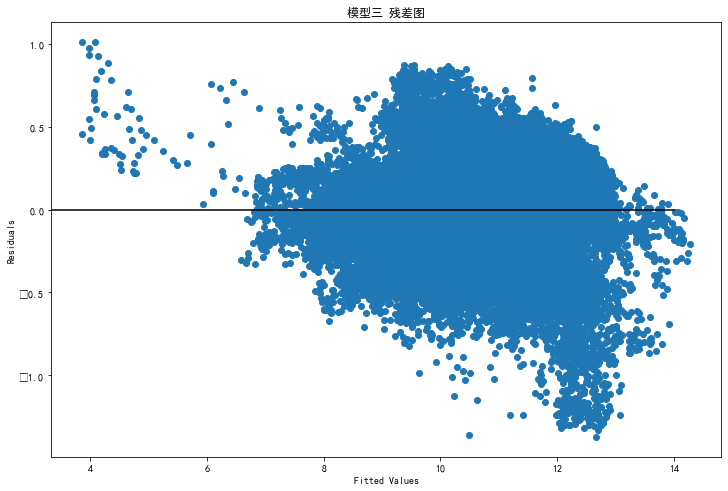

In [130]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='模型三 残差图', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

<AxesSubplot:title={'center':'模型三 观察值与拟合值'}, xlabel='Observed Values', ylabel='Fitted Values'>

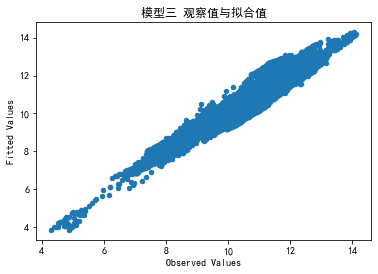

In [131]:
df_y = pd.DataFrame()
df_y['Fitted Values'] = yhat
df_y['Observed Values'] = y
df_y.plot.scatter(x = 'Observed Values', y = 'Fitted Values',title = '模型三 观察值与拟合值')

In [189]:
X = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FT_out','FPT_out','FP_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.963
Model:                                         OLS   Adj. R-squared:                  0.963
Method:                              Least Squares   F-statistic:                 3.311e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:40:44   Log-Likelihood:                 14140.
No. Observations:                           101957   AIC:                        -2.826e+04
Df Residuals:                               101948   BIC:                        -2.818e+04
Df Model:                                        8                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1380      0.013    -87.606      0.000      -1.163      -1.113
FT_in          1.1693      0.010    120.659      0.000       1.150       1.188
FPT_in         0.0300      0.003     11.455      0.000       0.025       0.035
FP_in        -13.0444      1.073    -12.160      0.000     -15.147     -10.942
FT_side        0.2515      0.012     21.262      0.000       0.228       0.275
FPT_side      -1.1999      0.008   -154.054      0.000      -1.215      -1.185
FT_out         6.8610      0.073     94.532      0.000       6.719       7.003
FPT_out     -281.7611      6.144    -45.859      0.000    -293.803    -269.719
FP_out      2321.7149    341.261      6.803      0.000    1652.848    2990.582
==============================================================================
Omnibus:                     6861.604   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26653.475
Skew:                          -0.243   Prob(JB):                         0.00
Kurtosis:                       5.457   Cond. No.                     1.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.04436772427107732

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


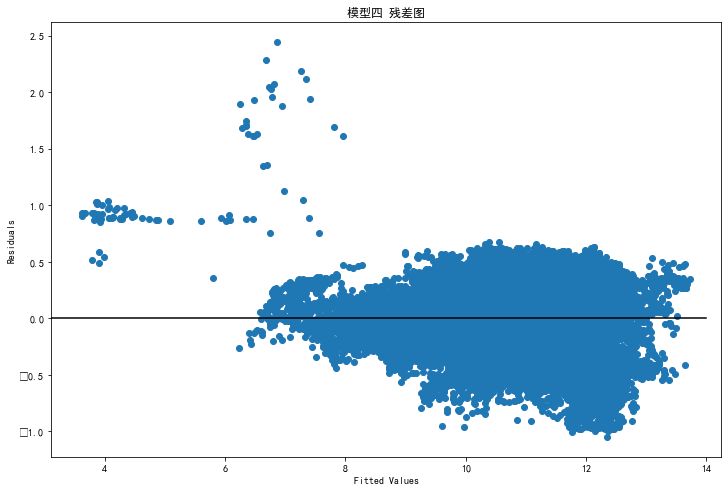

In [138]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='模型四 残差图', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

<AxesSubplot:title={'center':'模型四 观察值与拟合值'}, xlabel='Observed Values', ylabel='Fitted Values'>

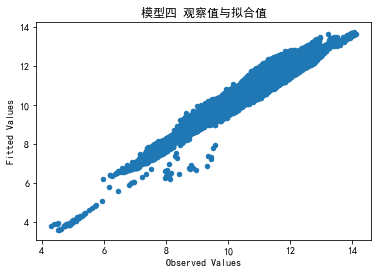

In [139]:
df_y = pd.DataFrame()
df_y['Fitted Values'] = yhat
df_y['Observed Values'] = y
df_y.plot.scatter(x = 'Observed Values', y = 'Fitted Values',title = '模型四 观察值与拟合值')

In [191]:
X = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side',
           'F1T5','F1P5T5','F1P5','F2T5','F2P5T5','F2P5']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.964
Model:                                         OLS   Adj. R-squared:                  0.964
Method:                              Least Squares   F-statistic:                 2.270e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:41:17   Log-Likelihood:                 15522.
No. Observations:                           101957   AIC:                        -3.102e+04
Df Residuals:                               101944   BIC:                        -3.089e+04
Df Model:                                       12                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0574      0.013    -80.915      0.000      -1.083      -1.032
FT_in          0.6339      0.027     23.151      0.000       0.580       0.688
FPT_in         0.0911      0.009     10.702      0.000       0.074       0.108
FP_in        -28.9029      3.714     -7.783      0.000     -36.181     -21.624
FT_side        2.3030      0.089     25.913      0.000       2.129       2.477
FPT_side      -2.5266      0.117    -21.630      0.000      -2.756      -2.298
FP_side      354.8308     37.332      9.505      0.000     281.660     428.001
F1T5          12.8450      0.267     48.197      0.000      12.323      13.367
F1P5T5      -551.4640     28.135    -19.601      0.000    -606.608    -496.320
F1P5        7012.9295   1492.280      4.699      0.000    4088.080    9937.779
F2T5         -24.9475      0.659    -37.848      0.000     -26.239     -23.656
F2P5T5      1123.9422     70.505     15.941      0.000     985.754    1262.131
F2P5       -1.935e+04   3713.164     -5.211      0.000   -2.66e+04   -1.21e+04
==============================================================================
Omnibus:                     6474.331   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12308.587
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       4.427   Cond. No.                     1.98e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.04318123964578088

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


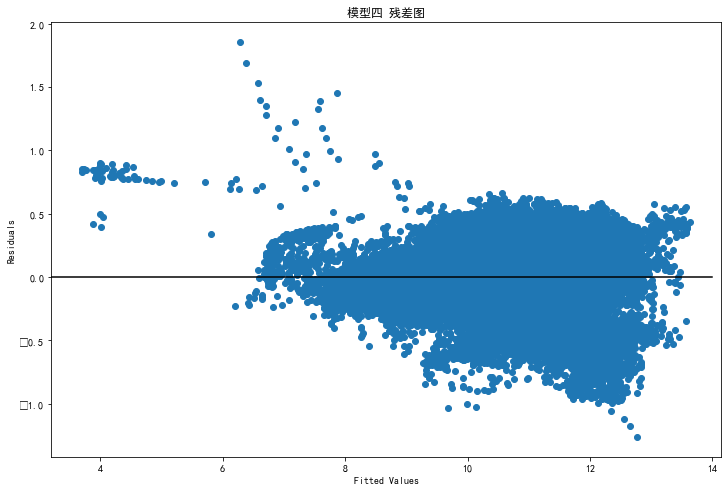

In [143]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='模型四 残差图', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

<AxesSubplot:title={'center':'模型四 观察值与拟合值'}, xlabel='Observed Values', ylabel='Fitted Values'>

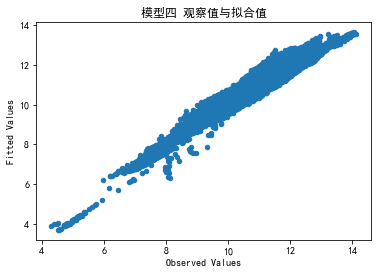

In [144]:
df_y = pd.DataFrame()
df_y['Fitted Values'] = yhat
df_y['Observed Values'] = y
df_y.plot.scatter(x = 'Observed Values', y = 'Fitted Values',title = '模型四 观察值与拟合值')

In [193]:
X = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side','FT_out','FPT_out','FP_out',
          'eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
       'eturb_m1_steam_flow_out', 'eturb_m1_steam_pressure_out',
       'eturb_m1_steam_temperature_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [194]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.965
Model:                                         OLS   Adj. R-squared:                  0.965
Method:                              Least Squares   F-statistic:                 1.672e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:41:31   Log-Likelihood:                 17616.
No. Observations:                           101957   AIC:                        -3.520e+04
Df Residuals:                               101939   BIC:                        -3.503e+04
Df Model:                                       17                                         
Covariance Type:                         nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.3450      0.698      6.222      0.000       2.976       5.714
FT_in                              -3.4643      0.169    -20.457      0.000      -3.796      -3.132
FPT_in                              1.2131      0.053     22.715      0.000       1.108       1.318
FP_in                            -497.3310     23.452    -21.206      0.000    -543.296    -451.366
FT_side                            11.4054      0.221     51.528      0.000      10.972      11.839
FPT_side                          -12.8065      0.289    -44.297      0.000     -13.373     -12.240
FP_side                          3793.0959     93.475     40.579      0.000    3609.887    3976.305
FT_out                             17.2569      0.405     42.588      0.000      16.463      18.051
FPT_out                          -167.0873      6.483    -25.773      0.000    -179.794    -154.381
FP_out                          -3.133e+04    806.652    -38.834      0.000   -3.29e+04   -2.97e+04
eturb_m1_steam_flow_in             -0.0001      0.015     -0.008      0.994      -0.029       0.029
eturb_m1_steam_pressure_in         -0.3344      0.071     -4.707      0.000      -0.474      -0.195
eturb_m1_steam_temperature_in       0.0104      0.002      5.917      0.000       0.007       0.014
eturb_m1_steam_flow_side           -0.4774      0.015    -32.909      0.000      -0.506      -0.449
eturb_m1_steam_pressure_side       -1.2076      0.072    -16.760      0.000      -1.349      -1.066
eturb_m1_steam_temperature_side    -0.0125      0.001    -17.013      0.000      -0.014      -0.011
eturb_m1_steam_flow_out             0.4773      0.010     49.767      0.000       0.458       0.496
eturb_m1_steam_pressure_out       405.0411      9.921     40.827      0.000     385.596     424.486
eturb_m1_steam_temperature_out     -0.1724      0.005    -32.256      0.000      -0.183      -0.162
==============================================================================
Omnibus:                     3719.653   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5386.148
Skew:                          -0.366   Prob(JB):                         0.00
Kurtosis:                       3.855   Cond. No.                     4.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [195]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.04144267162717364

In [196]:
X = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side',
           'F1T5','F1P5T5','F1P5','F2T5','F2P5T5','F2P5',
       'eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
       'eturb_m1_steam_flow_out', 'eturb_m1_steam_pressure_out',
       'eturb_m1_steam_temperature_out']]
X = sm.add_constant(X)
y = data['eturb_m1_electricity_generation']
model = sm.OLS(y, X)

In [197]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.965
Model:                                         OLS   Adj. R-squared:                  0.965
Method:                              Least Squares   F-statistic:                 1.424e+05
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:41:41   Log-Likelihood:                 17725.
No. Observations:                           101957   AIC:                        -3.541e+04
Df Residuals:                               101936   BIC:                        -3.521e+04
Df Model:                                       20                                         
Covariance Type:                         nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.1384      0.714      4.394      0.000       1.738       4.538
FT_in                              -3.4196      0.170    -20.162      0.000      -3.752      -3.087
FPT_in                              1.2431      0.053     23.277      0.000       1.138       1.348
FP_in                            -518.6586     23.476    -22.093      0.000    -564.671    -472.646
FT_side                            11.4160      0.222     51.445      0.000      10.981      11.851
FPT_side                          -12.8317      0.290    -44.281      0.000     -13.400     -12.264
FP_side                          3827.0751     93.705     40.842      0.000    3643.415    4010.736
F1T5                               16.4071      0.495     33.153      0.000      15.437      17.377
F1P5T5                           -297.4871     30.966     -9.607      0.000    -358.180    -236.794
F1P5                            -2.336e+04   1677.513    -13.924      0.000   -2.66e+04   -2.01e+04
F2T5                              -21.7653      0.735    -29.629      0.000     -23.205     -20.325
F2P5T5                            500.5470     78.283      6.394      0.000     347.113     653.981
F2P5                             1.633e+04   4030.067      4.053      0.000    8435.435    2.42e+04
eturb_m1_steam_flow_in              0.0216      0.015      1.431      0.152      -0.008       0.051
eturb_m1_steam_pressure_in         -0.1262      0.072     -1.742      0.081      -0.268       0.016
eturb_m1_steam_temperature_in       0.0065      0.002      3.669      0.000       0.003       0.010
eturb_m1_steam_flow_side           -0.4419      0.015    -28.959      0.000      -0.472      -0.412
eturb_m1_steam_pressure_side       -1.4714      0.077    -19.233      0.000      -1.621      -1.321
eturb_m1_steam_temperature_side    -0.0117      0.001    -15.510      0.000      -0.013      -0.010
eturb_m1_steam_flow_out             0.4635      0.010     46.302      0.000       0.444       0.483
eturb_m1_steam_pressure_out       359.9535     14.935     24.101      0.000     330.681     389.227
eturb_m1_steam_temperature_out     -0.1164      0.008    -13.930      0.000      -0.133      -0.100
==============================================================================
Omnibus:                     3678.370   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5241.324
Skew:                          -0.368   Prob(JB):                         0.00
Kurtosis:                       3.831   Cond. No.                     4.12e+16
=============================================

In [198]:
yhat = results.predict(X)
mean_squared_error(y,yhat)

0.04135465995917186

In [199]:
from pycaret.regression import *

In [206]:
df = data[['FT_in','FPT_in','FP_in','FT_side','FPT_side','FP_side',
           'F1T5','F1P5T5','F1P5','F2T5','F2P5T5','F2P5',
       'eturb_m1_steam_flow_in', 'eturb_m1_steam_pressure_in',
       'eturb_m1_steam_temperature_in', 'eturb_m1_steam_flow_side',
       'eturb_m1_steam_pressure_side', 'eturb_m1_steam_temperature_side',
       'eturb_m1_steam_flow_out', 'eturb_m1_steam_pressure_out',
       'eturb_m1_steam_temperature_out',
       'eturb_m1_electricity_generation']]

In [207]:
reg1 = setup(data = df, target = 'eturb_m1_electricity_generation')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6240
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(101957, 22)"
4,Missing Values,False
5,Numeric Features,21
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
best_model = compare_models(fold=10)

IntProgress(value=0, description='Processing: ', max=251)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:47:03
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 4 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Support Vector Machine
ETC,. . . . . . . . . . . . . . . . . .,39.91 Minutes Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,0.1551,0.0415,0.2036,0.9653,0.0172,0.0144,0.0280
1,Bayesian Ridge,0.1567,0.0422,0.2055,0.9647,0.0174,0.0146,0.1808
2,Random Sample Consensus,0.1541,0.0453,0.2124,0.9621,0.0198,0.0144,2.3615
3,Ridge Regression,0.1707,0.0487,0.2206,0.9593,0.0186,0.0158,0.0137
4,TheilSen Regressor,0.1574,0.0581,0.2396,0.9515,0.0293,0.0148,14.3990
5,Huber Regressor,0.1987,0.0686,0.2616,0.9426,0.0224,0.0187,1.2872
6,Elastic Net,0.2374,0.0809,0.2844,0.9323,0.0248,0.0226,0.0350
7,Passive Aggressive Regressor,0.2415,0.0914,0.3014,0.9234,0.0261,0.0229,0.0818
8,Lasso Regression,0.2783,0.1103,0.3320,0.9078,0.0295,0.0268,0.0323
9,Orthogonal Matching Pursuit,0.2972,0.1354,0.3679,0.8867,0.0315,0.0280,0.0155


In [145]:
yhat = results.predict(X)

In [146]:
results.resid

0         0.032804
1        -0.108361
2        -0.134419
3        -0.119273
4        -0.127142
            ...   
101952   -0.455555
101953   -0.422044
101954   -0.377872
101955   -0.357569
101956   -0.381136
Length: 101957, dtype: float64

In [147]:
results.resid_pearson

array([ 0.15785058, -0.52143014, -0.64682475, ..., -1.81831802,
       -1.72061745, -1.83402227])

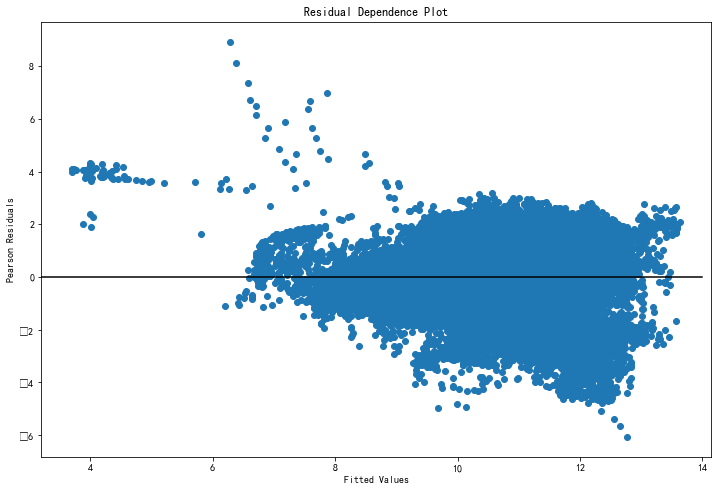

In [148]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='Fitted Values',
                          ylabel='Pearson Residuals')
ax.scatter(yhat, results.resid_pearson)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

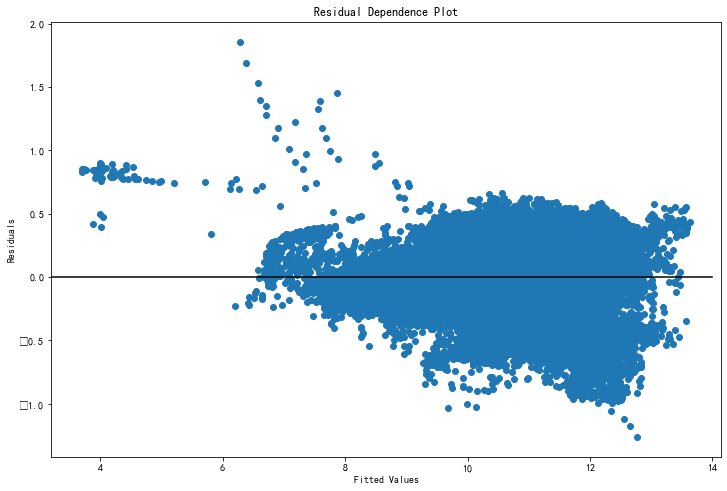

In [149]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='Fitted Values',
                          ylabel='Residuals')
ax.scatter(yhat, results.resid)
ax.axis('tight')
ax.plot([0.0, 14.0],[0.0, 0.0], 'k-');

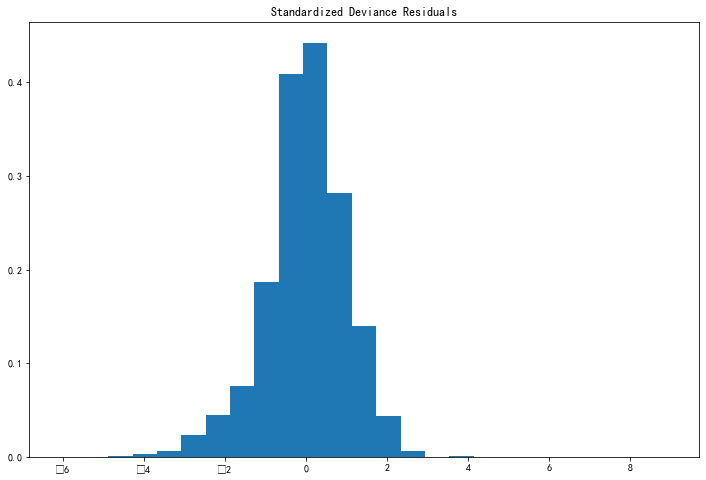

In [150]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title="Standardized Deviance Residuals")
ax.hist(stats.zscore(results.resid), bins=25, density=True);

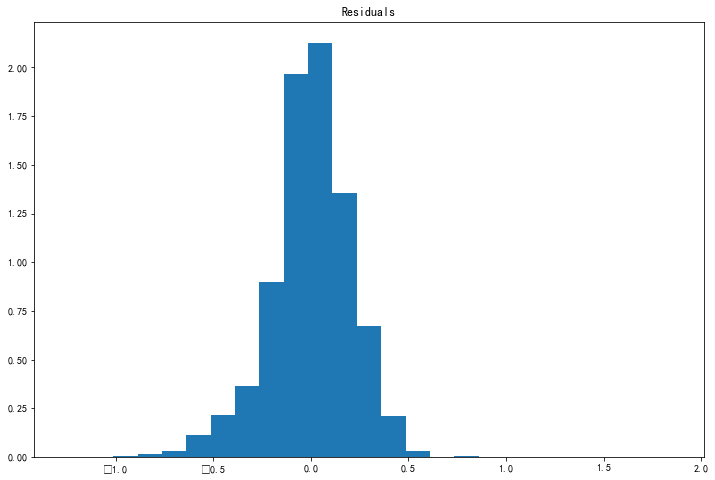

In [151]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title="Residuals")
ax.hist(results.resid, bins=25, density=True);

c:\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


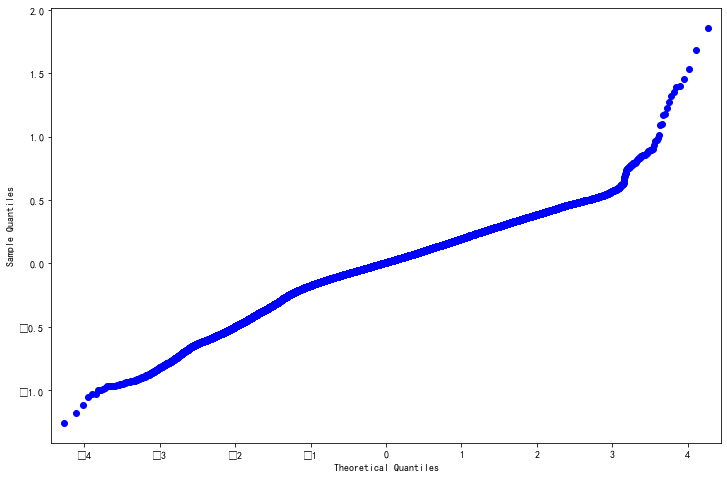

In [152]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = sm.graphics.qqplot(results.resid, line='r', ax=ax)

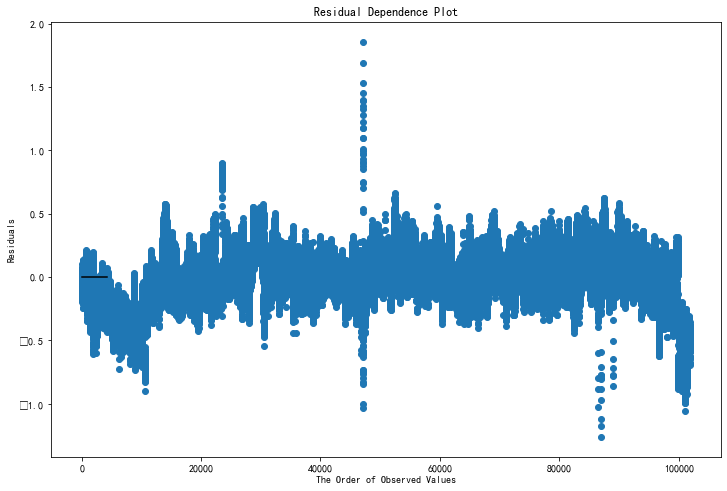

In [153]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, title='Residual Dependence Plot', xlabel='The Order of Observed Values',
                          ylabel='Residuals')
ax.scatter(results.resid.index, results.resid)
ax.axis('tight')
ax.plot([0.0, 4320],[0.0, 0.0], 'k-');

In [154]:
resid_sorted = results.resid.sort_values().reset_index(drop=True)

In [155]:
percentage = (y - min(y)) / (max(y) -min(y))

In [156]:
percentage.values

array([0.73225204, 0.74779212, 0.75594429, ..., 0.61659307, 0.6070822 ,
       0.60173234])

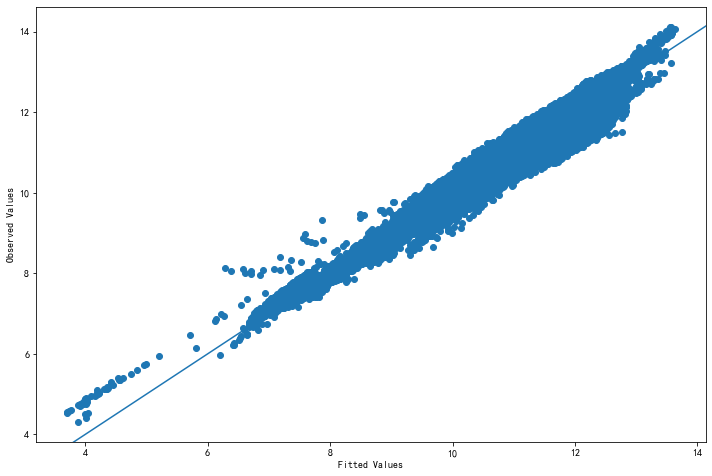

In [157]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='Observed Values', xlabel='Fitted Values')
ax.scatter(yhat, y)
y_vs_yhat = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)

In [158]:
rrrr = sm.OLS(percentage, sm.add_constant(results.resid, prepend=True)).fit()
rrrr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     eturb_m1_electricity_generation   R-squared:                       0.036
Model:                                         OLS   Adj. R-squared:                  0.036
Method:                              Least Squares   F-statistic:                     3816.
Date:                             Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                                     17:28:45   Log-Likelihood:                 80878.
No. Observations:                           101957   AIC:                        -1.618e+05
Df Residuals:                               101955   BIC:                        -1.617e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6458      0.000   1883.787      0.000       0.645       0.646
0              0.1019      0.002     61.770      0.000       0.099       0.105
==============================================================================
Omnibus:                     4853.934   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5572.526
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       3.200   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

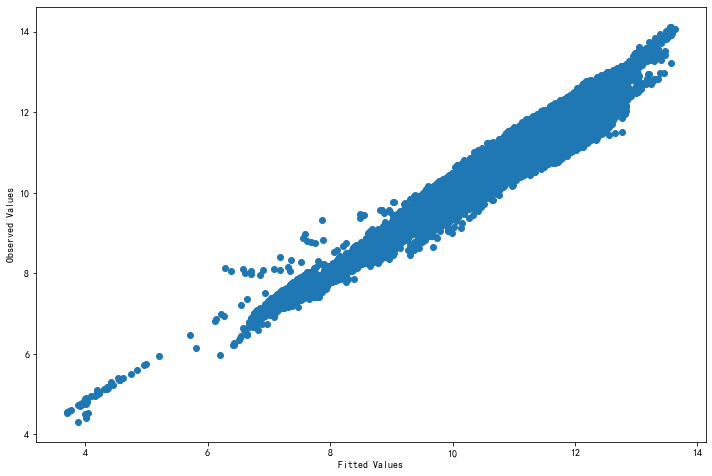

In [159]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='Observed Values', xlabel='Fitted Values')
ax.scatter(yhat, y)
fig = abline_plot(model_results=rrrr, ax=ax)